<a href="https://colab.research.google.com/github/Hyunseo-BA/BigData_Lab/blob/master/dnn_boston_regression_standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
print('train data shape:', train_data.shape)
print('rest data shape:', test_data.shape)

train data shape: (404, 13)
rest data shape: (102, 13)


In [3]:
train_targets[0]

15.2

#### 학습 데이터 표준화

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [5]:
print(train_data.mean(axis=0),
      train_data.std(axis=0))

[-1.01541438e-16  1.09923072e-17  1.80933376e-15 -7.80453809e-17
 -5.25047552e-15  6.43187374e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.05526149e-16  2.36614908e-14  5.96710525e-15
  6.13920356e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.summary()

# dense_2의 파라미터 수가 65인 이유는, 1개의 바이어스가 파라미터 수에 더 해짐

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
history = model.fit(train_data, train_targets,
                    epochs=100,
                    batch_size=1,
                    validation_split=0.2) # 검증 데이터 =  학습 데이터 중 20%

Epoch 1/100
323/323 [==============================] - 1s 2ms/step - loss: 158.8704 - mae: 9.0837 - val_loss: 38.5409 - val_mae: 4.5048
Epoch 2/100
323/323 [==============================] - 0s 2ms/step - loss: 28.8593 - mae: 3.5761 - val_loss: 22.2158 - val_mae: 3.5265
Epoch 3/100
323/323 [==============================] - 0s 2ms/step - loss: 20.1762 - mae: 2.9696 - val_loss: 17.2450 - val_mae: 3.0969
Epoch 4/100
323/323 [==============================] - 0s 1ms/step - loss: 17.4428 - mae: 2.7607 - val_loss: 15.4348 - val_mae: 2.8238
Epoch 5/100
323/323 [==============================] - 0s 2ms/step - loss: 14.9060 - mae: 2.5521 - val_loss: 13.2704 - val_mae: 2.7483
Epoch 6/100
323/323 [==============================] - 0s 2ms/step - loss: 13.3024 - mae: 2.4123 - val_loss: 13.0364 - val_mae: 2.8284
Epoch 7/100
323/323 [==============================] - 0s 1ms/step - loss: 12.4809 - mae: 2.3697 - val_loss: 11.7725 - val_mae: 2.5801
Epoch 8/100
323/323 [==============================] -

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

In [ ]:
import matplotlib.pyplot as plt

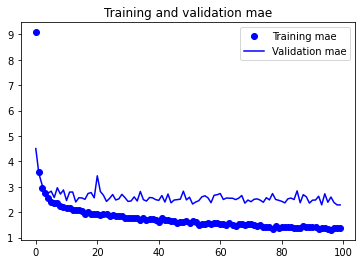

In [ ]:
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

plt.show()

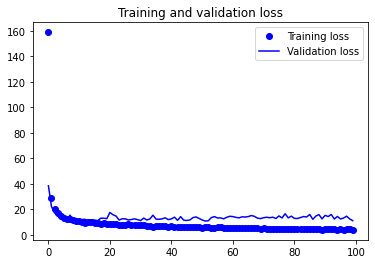

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.3350 - mae: 2.6930
